<a href="https://colab.research.google.com/github/saloni-singh14/PolynomialRegressionFromScratch/blob/main/FoDS_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")
df=pd.read_csv('/content/gdrive/My Drive/FoDS_Assignment/FoDS-A1.csv')
df.head()

Mounted at /content/gdrive


,Strength,Temperature,Pressure
0,30.7,240,16
1,24.7,250,18
2,30.6,260,16
3,32.8,240,10
4,20.7,240,20


In [ ]:
Pressure = df['Pressure']
Strength =df['Strength']
print(Pressure.max(),Pressure.min())

20 10


#Generating polynomial features

In [ ]:
for i in range(1,10):
  for j in range(i+1):
    df[str(i)+'_Strength_'+ str(j) + '_Temperature_' + str(i-j)] = (df['Strength']**j * df['Temperature']**(i-j)) 

df.head()

,Strength,Temperature,Pressure,1_Strength_0_Temperature_1,1_Strength_1_Temperature_0,2_Strength_0_Temperature_2,2_Strength_1_Temperature_1,2_Strength_2_Temperature_0,3_Strength_0_Temperature_3,3_Strength_1_Temperature_2,3_Strength_2_Temperature_1,3_Strength_3_Temperature_0,4_Strength_0_Temperature_4,4_Strength_1_Temperature_3,4_Strength_2_Temperature_2,4_Strength_3_Temperature_1,4_Strength_4_Temperature_0,5_Strength_0_Temperature_5,5_Strength_1_Temperature_4,5_Strength_2_Temperature_3,5_Strength_3_Temperature_2,5_Strength_4_Temperature_1,5_Strength_5_Temperature_0,6_Strength_0_Temperature_6,6_Strength_1_Temperature_5,6_Strength_2_Temperature_4,6_Strength_3_Temperature_3,6_Strength_4_Temperature_2,6_Strength_5_Temperature_1,6_Strength_6_Temperature_0,7_Strength_0_Temperature_7,7_Strength_1_Temperature_6,7_Strength_2_Temperature_5,7_Strength_3_Temperature_4,7_Strength_4_Temperature_3,7_Strength_5_Temperature_2,7_Strength_6_Temperature_1,7_Strength_7_Temperature_0,8_Strength_0_Temperature_8,8_Strength_1_Temperature_7,8_Strength_2_Temperature_6,8_Strength_3_Temperature_5,8_Strength_4_Temperature_4,8_Strength_5_Temperature_3,8_Strength_6_Temperature_2,8_Strength_7_Temperature_1,8_Strength_8_Temperature_0,9_Strength_0_Temperature_9,9_Strength_1_Temperature_8,9_Strength_2_Temperature_7,9_Strength_3_Temperature_6,9_Strength_4_Temperature_5,9_Strength_5_Temperature_4,9_Strength_6_Temperature_3,9_Strength_7_Temperature_2,9_Strength_8_Temperature_1,9_Strength_9_Temperature_0
0,30.7,240,16,240.0,30.7,57600.0,7368.0,942.49,13824000.0,1768320.0,226197.6,28934.443,3.317760e+09,424396800.0,54287424.0,6944266.32,8.882874e+05,7.962624e+11,1.018552e+11,1.302898e+10,1.666624e+09,2.131890e+08,2.727042e+07,1.911030e+14,2.444526e+13,3.126956e+12,3.999897e+11,5.116535e+10,6.544902e+09,8.372020e+08,4.586471e+16,5.866861e+15,7.504693e+14,9.599754e+13,1.227969e+13,1.570776e+12,2.009285e+11,2.570210e+10,-7.439213e+18,1.408047e+18,1.801126e+17,2.303941e+16,2.947124e+15,3.769863e+14,4.822283e+13,6.168504e+12,7.890545e+11,3.923138e+18,-2.283838e+20,4.322703e+19,5.529458e+18,7.073099e+17,9.047672e+16,1.157348e+16,1.480441e+15,1.893731e+14,2.422397e+13
1,24.7,250,18,250.0,24.7,62500.0,6175.0,610.09,15625000.0,1543750.0,152522.5,15069.223,3.906250e+09,385937500.0,38130625.0,3767305.75,3.722098e+05,9.765625e+11,9.648438e+10,9.532656e+09,9.418264e+08,9.305245e+07,9.193582e+06,2.441406e+14,2.412109e+13,2.383164e+12,2.354566e+11,2.326311e+10,2.298396e+09,2.270815e+08,6.103516e+16,6.030273e+15,5.957910e+14,5.886415e+13,5.815778e+12,5.745989e+11,5.677037e+10,5.608913e+09,-3.187955e+18,1.507568e+18,1.489478e+17,1.471604e+16,1.453945e+15,1.436497e+14,1.419259e+13,1.402228e+12,1.385401e+11,-3.778758e+18,-7.874249e+19,3.723694e+19,3.679010e+18,3.634861e+17,3.591243e+16,3.548148e+15,3.505570e+14,3.463504e+13,3.421941e+12
2,30.6,260,16,260.0,30.6,67600.0,7956.0,936.36,17576000.0,2068560.0,243453.6,28652.616,4.569760e+09,537825600.0,63297936.0,7449680.16,8.767700e+05,1.188138e+12,1.398347e+11,1.645746e+10,1.936917e+09,2.279602e+08,2.682916e+07,3.089158e+14,3.635701e+13,4.278940e+12,5.035984e+11,5.926966e+10,6.975583e+09,8.209724e+08,8.031810e+16,9.452823e+15,1.112525e+15,1.309356e+14,1.541011e+13,1.813651e+12,2.134528e+11,2.512176e+10,2.435962e+18,2.457734e+18,2.892564e+17,3.404325e+16,4.006629e+15,4.715494e+14,5.549773e+13,6.531656e+12,7.687257e+11,6.160921e+18,7.454045e+19,7.520666e+19,8.851245e+18,1.041723e+18,1.226028e+17,1.442941e+16,1.698231e+15,1.998687e+14,2.352301e+13
3,32.8,240,10,240.0,32.8,57600.0,7872.0,1075.84,13824000.0,1889280.0,258201.6,35287.552,3.317760e+09,453427200.0,61968384.0,8469012.48,1.157432e+06,7.962624e+11,1.088225e+11,1.487241e+10,2.032563e+09,2.777836e+08,3.796376e+07,1.911030e+14,2.611741e+13,3.569379e+12,4.878151e+11,6.666807e+10,9.111302e+09,1.245211e+09,4.586471e+16,6.268178e+15,8.566509e+14,1.170756e+14,1.600034e+13,2.186713e+12,2.988507e+11,4.084293e+10,-7.439213e+18,1.504363e+18,2.055962e+17,2.809815e+16,3.840081e+15,5.248110e+14,7.172

#Normalization for all polynomial variables

In [ ]:
df=(df-df.mean())/df.std()
# norm_pressure = (pressure - pressure.mean())/pressure.std()
# df['Pressure'] = norm_pressure
df.head()


,Strength,Temperature,Pressure,1_Strength_0_Temperature_1,1_Strength_1_Temperature_0,2_Strength_0_Temperature_2,2_Strength_1_Temperature_1,2_Strength_2_Temperature_0,3_Strength_0_Temperature_3,3_Strength_1_Temperature_2,3_Strength_2_Temperature_1,3_Strength_3_Temperature_0,4_Strength_0_Temperature_4,4_Strength_1_Temperature_3,4_Strength_2_Temperature_2,4_Strength_3_Temperature_1,4_Strength_4_Temperature_0,5_Strength_0_Temperature_5,5_Strength_1_Temperature_4,5_Strength_2_Temperature_3,5_Strength_3_Temperature_2,5_Strength_4_Temperature_1,5_Strength_5_Temperature_0,6_Strength_0_Temperature_6,6_Strength_1_Temperature_5,6_Strength_2_Temperature_4,6_Strength_3_Temperature_3,6_Strength_4_Temperature_2,6_Strength_5_Temperature_1,6_Strength_6_Temperature_0,7_Strength_0_Temperature_7,7_Strength_1_Temperature_6,7_Strength_2_Temperature_5,7_Strength_3_Temperature_4,7_Strength_4_Temperature_3,7_Strength_5_Temperature_2,7_Strength_6_Temperature_1,7_Strength_7_Temperature_0,8_Strength_0_Temperature_8,8_Strength_1_Temperature_7,8_Strength_2_Temperature_6,8_Strength_3_Temperature_5,8_Strength_4_Temperature_4,8_Strength_5_Temperature_3,8_Strength_6_Temperature_2,8_Strength_7_Temperature_1,8_Strength_8_Temperature_0,9_Strength_0_Temperature_9,9_Strength_1_Temperature_8,9_Strength_2_Temperature_7,9_Strength_3_Temperature_6,9_Strength_4_Temperature_5,9_Strength_5_Temperature_4,9_Strength_6_Temperature_3,9_Strength_7_Temperature_2,9_Strength_8_Temperature_1,9_Strength_9_Temperature_0
0,0.094719,-0.316132,0.292681,-0.316132,0.094719,-0.372455,-0.122363,-0.026986,-0.423475,-0.256394,-0.172229,-0.137672,-0.468434,-0.349733,-0.279611,-0.243358,-0.228646,-0.506921,-0.418838,-0.360562,-0.325208,-0.305808,-0.296793,-0.538854,-0.471223,-0.422115,-0.388358,-0.366113,-0.351899,-0.342916,-0.564424,-0.510974,-0.468804,-0.436679,-0.412649,-0.394677,-0.380949,-0.369992,-1.167837,-0.540698,-0.503777,-0.473122,-0.447967,-0.427272,-0.409963,-0.395078,-0.381827,0.251657,-1.015340,-0.529371,-0.500000,-0.474165,-0.451518,-0.431537,-0.413659,-0.397365,-0.382224
1,-0.717161,0.000000,0.878044,0.000000,-0.717161,-0.063128,-0.562059,-0.768771,-0.124503,-0.499669,-0.691249,-0.778029,-0.182847,-0.478189,-0.645120,-0.727306,-0.756324,-0.237132,-0.475800,-0.617990,-0.691044,-0.717913,-0.715408,-0.286616,-0.482344,-0.602069,-0.664616,-0.687395,-0.684141,-0.664829,-0.330846,-0.492621,-0.592598,-0.644700,-0.662629,-0.657749,-0.638613,-0.611264,-0.409800,-0.503818,-0.586661,-0.629016,-0.641990,-0.635104,-0.615705,-0.589080,-0.558837,-1.189664,-0.164668,-0.582470,-0.616039,-0.624302,-0.615328,-0.595454,-0.569297,-0.540042,-0.509780
2,0.081188,0.316132,0.292681,0.316132,0.081188,0.258825,0.094352,-0.040666,0.199370,0.068854,-0.050666,-0.150688,0.139147,0.029124,-0.075769,-0.166368,-0.240423,0.079456,-0.016038,-0.108129,-0.188780,-0.255138,-0.307011,0.021444,-0.062563,-0.143400,-0.214395,-0.272795,-0.318203,-0.351479,-0.033948,-0.108227,-0.179039,-0.240956,-0.291585,-0.330538,-0.358563,-0.376960,0.592994,-0.151713,-0.213509,-0.267022,-0.310295,-0.343045,-0.365980,-0.380297,-0.387359,0.670433,0.706705,-0.245886,-0.291697,-0.328136,-0.355071,-0.373205,-0.383659,-0.387688,-0.386522
3,0.378878,-0.316132,-1.463406,-0.316132,0.378878,-0.372455,0.063393,0.270598,-0.423475,-0.125359,0.053229,0.155742,-0.468434,-0.252770,-0.105847,-0.011093,0.046547,-0.506921,-0.344945,-0.224834,-0.140503,-0.084229,-0.049162,-0.538854,-0.413856,-0.315073,-0.240896,-0.187606,-0.151107,-0.127642,-0.564424,-0.465902,-0.383823,-0.318599,-0.268759,-0.232019,-0.205925,-0.188186,-1.167837,-0.505006,-0.436003,-0.378372,-0.331936,-0.295605,-0.267877,-0.247172,-0.232007,0.251657,-1.104149,-0.475154,-0.423866,-0.380582,-0.345008,-0.316335,-0.293529,-0.275523,-0.261324
4,-1.258415,-0.316132,1.463406,-0.316132,-1.258415,-0.372455,-1.006915,-1.174030,-0.423475,-0.880370,-1.041264,-1.064349,-0.468434,-0.811461,-0.949386,-0.976910,-0.949169,-0.506921,-0.770711,-0.883729,-0.908552,-0.885955,-0.840296,-0.538854,-0.744399,-0.

In [ ]:
# shuffle the DataFrame rows
df = df.sample(frac = 1)
# Creating a dataframe with 70%
# values of original dataframe
train_data = df.sample(frac = 0.70)
# Creating dataframe with
# rest of the 30% values
test_data = df.drop(train_data.index)
train_data = train_data.drop(columns=['Strength', 'Temperature'])
test_data = test_data.drop(columns=['Strength', 'Temperature'])
pressure = df['Pressure']
df.head()

,Strength,Temperature,Pressure,1_Strength_0_Temperature_1,1_Strength_1_Temperature_0,2_Strength_0_Temperature_2,2_Strength_1_Temperature_1,2_Strength_2_Temperature_0,3_Strength_0_Temperature_3,3_Strength_1_Temperature_2,3_Strength_2_Temperature_1,3_Strength_3_Temperature_0,4_Strength_0_Temperature_4,4_Strength_1_Temperature_3,4_Strength_2_Temperature_2,4_Strength_3_Temperature_1,4_Strength_4_Temperature_0,5_Strength_0_Temperature_5,5_Strength_1_Temperature_4,5_Strength_2_Temperature_3,5_Strength_3_Temperature_2,5_Strength_4_Temperature_1,5_Strength_5_Temperature_0,6_Strength_0_Temperature_6,6_Strength_1_Temperature_5,6_Strength_2_Temperature_4,6_Strength_3_Temperature_3,6_Strength_4_Temperature_2,6_Strength_5_Temperature_1,6_Strength_6_Temperature_0,7_Strength_0_Temperature_7,7_Strength_1_Temperature_6,7_Strength_2_Temperature_5,7_Strength_3_Temperature_4,7_Strength_4_Temperature_3,7_Strength_5_Temperature_2,7_Strength_6_Temperature_1,7_Strength_7_Temperature_0,8_Strength_0_Temperature_8,8_Strength_1_Temperature_7,8_Strength_2_Temperature_6,8_Strength_3_Temperature_5,8_Strength_4_Temperature_4,8_Strength_5_Temperature_3,8_Strength_6_Temperature_2,8_Strength_7_Temperature_1,8_Strength_8_Temperature_0,9_Strength_0_Temperature_9,9_Strength_1_Temperature_8,9_Strength_2_Temperature_7,9_Strength_3_Temperature_6,9_Strength_4_Temperature_5,9_Strength_5_Temperature_4,9_Strength_6_Temperature_3,9_Strength_7_Temperature_2,9_Strength_8_Temperature_1,9_Strength_9_Temperature_0
1613,0.838943,0.632264,-0.878044,0.632264,0.838943,0.593403,0.764400,0.794132,0.549139,0.686786,0.726824,0.716900,0.500516,0.612626,0.653430,0.649904,0.618952,0.448681,0.541261,0.579257,0.579089,0.553377,0.511269,0.394799,0.472151,0.506282,0.507798,0.486222,0.449229,0.402695,0.339974,0.405242,0.435469,0.437834,0.419637,0.387274,0.345919,0.299565,-1.383826,0.340744,0.367421,0.370258,0.354940,0.326792,0.290318,0.249107,0.205899,0.844708,-1.497210,0.302564,0.305736,0.292960,0.268671,0.236770,0.200445,0.162179,0.123833
554,0.351815,1.264528,1.463406,1.264528,0.351815,1.300436,0.646460,0.241409,1.330352,0.798018,0.405456,0.126111,1.353846,0.888369,0.514233,0.229334,0.017946,1.370760,0.946315,0.588554,0.304257,0.086461,-0.075640,1.381171,0.984129,0.639952,0.358800,0.138480,-0.028538,-0.151315,1.385353,1.007978,0.675173,0.398282,0.177762,0.008263,-0.117899,-0.208740,-0.789177,1.021415,0.698432,0.426347,0.207103,0.036804,-0.091189,-0.184255,-0.249414,1.015556,-0.702136,0.712532,0.445564,0.228586,0.058687,-0.069983,-0.164269,-0.230867,-0.275755
1137,0.879537,0.632264,0.292681,0.632264,0.879537,0.593403,0.794254,0.842803,0.549139,0.710477,0.768308,0.771823,0.500516,0.632349,0.689399,0.698815,0.677884,0.448681,0.558170,0.610865,0.622846,0.606760,0.571917,0.394799,0.486919,0.534325,0.547100,0.534604,0.504553,0.462971,0.339974,0.418295,0.460515,0.473238,0.463510,0.437693,0.401051,0.357741,-1.383826,0.352373,0.389893,0.402218,0.394742,0.372706,0.340669,0.302351,0.260668,0.844708,-1.511963,0.322787,0.334627,0.329074,0.310455,0.282697,0.249096,0.212288,0.174306
505,-0.284158,-0.632264,-0.292681,-0.632264,-0.284158,-0.669157,-0.472867,-0.393147,-0.698543,-0.573159,-0.504481,-0.470976,-0.720468,-0.633428,-0.576183,-0.540282,-0.517358,-0.735304,-0.671038,-0.622535,-0.586543,-0.559057,-0.536825,-0.743674,-0.693804,-0.651632,-0.616290,-0.586180,-0.559756,-0.535786,-0.746362,-0.706022,-0.668454,-0.633996,-0.602435,-0.573325,-0.546187,-0.520602,1.554994,-0.710457,-0.676326,-0.642836,-0.610587,-0.579849,-0.550664,-0.522963,-0.496633,-1.722915,1.525007,-0.677617,-0.645137,-0.612728,-0.581118,-0.550713,-0.521697,-0.494117,-0.467953
834,-1.529042,-0.948396,0.878044,-0.948396,-1.529042,-0.953233,-1.321668,-1.349880,-0.950702,-1.191535,-1.223763,-1.171983,-0.941686,-1.102176,-1.124848,-1.082035,-1.011868,-0.927241,-1.034494,-1.045707,-1.006673,-0.944828,-0.875354,-0.908492,-0.979244,-0.980466,-0.943047,-0.887111,-0.824605,-0.762081,-0.886546,-0.931770,-0.925196,-0.888643,-0.837188,-0.780263,-0.7

# ##

---



In [ ]:
#train_df = df[0:int(df_size*0.7)] #training data is 70%
#test_df = df[int(df_size*0.7):] #testing data is 30%

print("training data length: ", len(train_data))
print("testing data length: ", len(test_data))

training data length:  1155
testing data length:  495


In [ ]:
def init_params(lenw):
  w = np.random.rand(1, lenw)
  b = 0
  return w, b

In [ ]:
def predict(X, w, b):
  z = np.dot(w, X)+b
  return z

In [ ]:
def cost_function(z, y):#MSE -> Mean Squared Error. Cost function = SSR/2n
  m = y.shape[0]
  J = (1/(m))*np.sum(np.square(z-y))
  return J

In [ ]:
def cost_function_ridge(z,y,theta,lda):
  m = y.shape[0]
  J = (1/(2*m))*np.sum(np.square(z-y)) + lda*(np.dot(theta,theta.T))
  return J[0][0]

In [ ]:
def cost_function_lasso(z,y,theta,lda):
  m = y.shape[0]
  J = (1/(2*m))*np.sum(np.square(z-y)) + lda*(np.sum(np.abs(theta)))
  return J

In [ ]:
def get_grads(X, y, z):
  m = y.shape[0]
  dz = (1/m)*(z-y)
  dw = np.dot(dz, X.T)#doubt??
  db = np.sum(dz)
  return dw, db

In [ ]:
def get_grads_ridge(X, y, z, theta, lda):
  m = y.shape[0]
  dz = (1/m)*(z-y)
  dw = np.dot(dz, X.T) + (lda/m)*theta
  db = np.sum(dz)
  return dw, db

In [ ]:
def get_grads_lasso(X, y, z, theta, lda):
  m = y.shape[0]
  dz = (1/m)*(z-y)
  dw = np.dot(dz, X.T) + (lda/m)*np.sign(theta)
  db = np.sum(dz)
  return dw, db

In [ ]:
def update_params(w, b, dw, db, lr):
  w = w-lr*dw
  b = b-lr*db
  return w, b

#GD

In [ ]:
#randomly generated lambdas
lmbdas=[0.649, 0.819, 0.0363, 0.7586, 0.457, 0.111, 0.9195, 0.9927, 0.0085, 0.6938, 0.3898, 0.5802, 0.739, 0.965, 0.549, 0.325, 0.004, 0.185, 0.676, 0.242, 0.449, 0.7075, 0.121, 0.8571, 0.085, 0.405, 0.1731, 0.0607, 0.2144, 0.07]
for i in range(len(lmbdas)):
  lmbdas[i]=lmbdas[i]/1000
  if i%3==0:
    lmbdas[i]=lmbdas[i]/1000
  elif i%5==0:
    lmbdas[i]=lmbdas[i]/1000000
lmbdas.sort()
print(lmbdas)

[1.11e-10, 3.898e-10, 4.0500000000000005e-10, 4.49e-10, 6.07e-08, 8.500000000000001e-08, 3.2499999999999996e-07, 6.490000000000001e-07, 6.760000000000001e-07, 6.937999999999999e-07, 7.075e-07, 7.389999999999999e-07, 7.586e-07, 9.194999999999999e-07, 4e-06, 8.5e-06, 3.63e-05, 7.000000000000001e-05, 0.000121, 0.0001731, 0.000185, 0.0002144, 0.000242, 0.000457, 0.000549, 0.0005802, 0.000819, 0.0008571, 0.0009649999999999999, 0.0009927]


In [ ]:
def poly_regression(train_df, test_df, lr, epochs, degree, regularisation = None, lamda = 0, printcost=True):

  df_train = pd.DataFrame()
  df_test = pd.DataFrame()

  for i in range(1,degree+1):#To remove unnecessary
    for col in train_df.columns:
      if col!='Pressure':
        if int(col.split('_')[0]) <= degree:
          df_train[col] = train_df[col]
          df_test[col] = test_df[col]
      else:
          df_train[col] = train_df[col]
          df_test[col] = test_df[col]
  X_train = np.array(df_train.drop(columns = ['Pressure'])).T
  X_test = np.array(df_test.drop(columns = ['Pressure'])).T

  y_train = np.array(df_train['Pressure']).T
  y_test = np.array(df_test['Pressure']).T

  lenw = X_train.shape[0]
  w, b = init_params(lenw)
  
  costs_list_train = []
  costs_list_test = []

  final_errors = {"RMSE_train": 0, "RMSE_test": 0}

  for i in range(1, epochs+1):
    z_train = predict(X_train, w, b)
    if(regularisation == None):
      cost_train = cost_function(z_train, y_train)
      dw, db = get_grads(X_train, y_train, z_train)

    elif regularisation == "ridge":
      cost_train = cost_function_ridge(z_train, y_train, w, lamda)
      dw, db = get_grads_ridge(X_train, y_train, z_train, w, lamda)

    elif regularisation == "lasso":
      cost_train = cost_function_lasso(z_train, y_train, w, lamda)
      dw, db = get_grads_lasso(X_train, y_train, z_train, w, lamda)

    w, b = update_params(w, b, dw, db, lr)

    z_test = predict(X_test, w, b)
    cost_test = cost_function(z_test, y_test)

    if i%50 == 0: #printing every 50 iterations
      costs_list_train.append(cost_train)
      costs_list_test.append(cost_test)

    #if printcost and i%50==0:
     # print("Epoch: " + str(i) + " --> " + "Train cost = " + str(cost_train) + " | Test cost = " + str(cost_test))

  if(i == epochs):
      RMSE_train = np.sqrt(np.mean(np.square(z_train-y_train)))
      final_errors["RMSE_train"] += RMSE_train
      
      z_test = predict(X_test, w, b)
      RMSE_test = np.sqrt(np.mean(np.square(z_test-y_test)))
      final_errors["RMSE_test"] += RMSE_test

  if printcost:
    plt.plot(costs_list_train)
    plt.xlabel("cost per 50 iters")
    plt.ylabel("Training cost")
    if regularisation==None:
      plt.title("Learning rate = " + str(lr))
    else:
      plt.title("Learning rate = " + str(lr) + ", lambda is " + str(lamda))
    plt.show()

  
  return w, b, costs_list_train, costs_list_test, final_errors, X_test

  #return df_train
  #do the same for test hehe




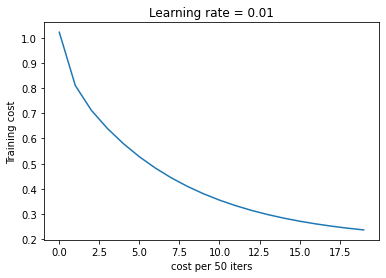

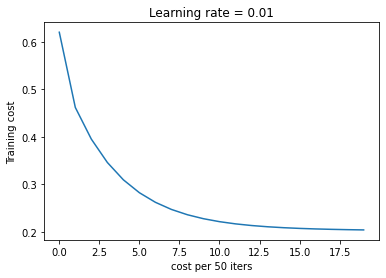

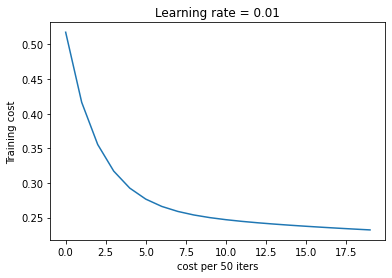

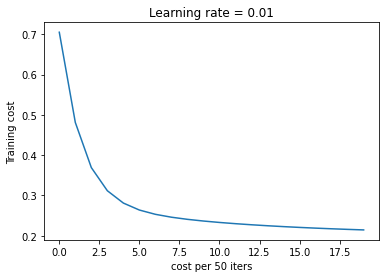

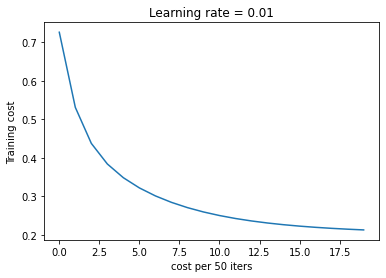

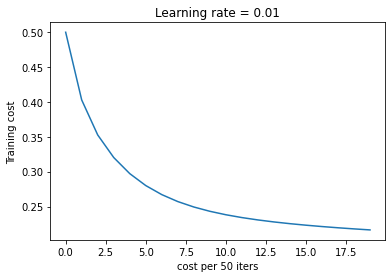

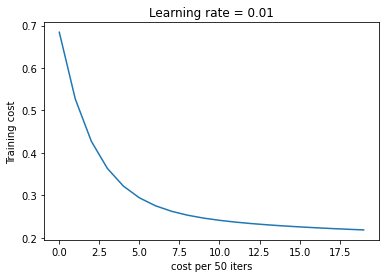

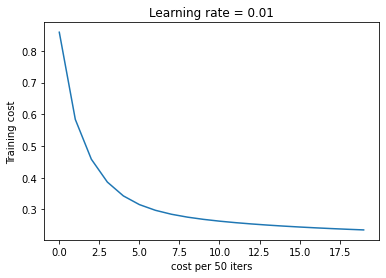

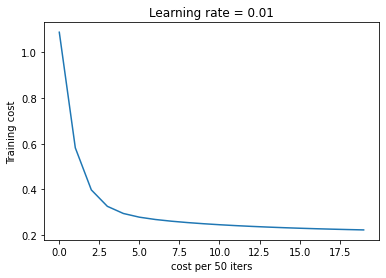

In [ ]:
non_reg = []
for degree in range(1,10):
  w, b, costs_list_train, costs_list_test, final_errors, x_test = poly_regression(train_data, test_data, 0.01, 1000, degree)
  train_error =costs_list_train[-1]
  test_error =costs_list_test[-1]
  non_reg.append([train_error,test_error])
# #for degree 0
# # X_train = np.array().T
# y_train = np.array(train_data['Pressure']).T
# b=0
# b=(train_data['Pressure'].mean())
# print(b)
# train_data.head()
# z_train = b
# print(z_train)
# print(y_train)
# train_cost_0=cost_function(z_train,y_train)
# print(train_cost_0)
# y_test = np.array(test_data['Pressure']).T
# z_test = b
# # test_arr=np.empty(len(test_data))
# # z_test = test_arr.fill(b)
# test_cost_0=cost_function(z_test,y_test)
# print(test_cost_0)

In [ ]:
for i in range(0,9):
  print("For degree ",i+1,"Train error =", non_reg[i][0],"Test error =", non_reg[i][1])
  train=non_reg[i][0];
  test=non_reg[i][1];

  # plt.plot(degree,train ,colour="red")
  # plt.plot(degree,test ,colour="blue")

For degree  1 Train error = 0.23687871287126716 Test error = 0.2677832776621972
For degree  2 Train error = 0.2038606519999892 Test error = 0.23055630497087154
For degree  3 Train error = 0.23219082750226075 Test error = 0.2602654677454331
For degree  4 Train error = 0.21449188474974695 Test error = 0.24407964556699638
For degree  5 Train error = 0.21305405296464874 Test error = 0.2438081188040906
For degree  6 Train error = 0.21651434521748908 Test error = 0.24886558533119166
For degree  7 Train error = 0.21833476609256894 Test error = 0.2526206612932038
For degree  8 Train error = 0.23540660438422606 Test error = 0.27041602612208243
For degree  9 Train error = 0.22265264103461335 Test error = 0.25342139210932335


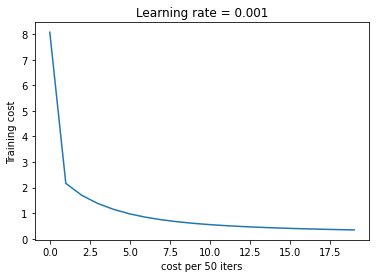

0.3481471162367409
0.3976498729592514


In [ ]:
w, b, costs_list_train, costs_list_test, final_errors, x_test = poly_regression(train_data, test_data, 0.001, 1000, 10)
print(costs_list_train[-1])
print(costs_list_test[-1])


In [ ]:
z_test = predict(x_test, w, b)

In [ ]:
z_test

array([[-9.74076338e-01, -2.01475831e-01, -2.40648053e-01,
         7.63767879e-01,  6.04662890e-01,  8.28148047e-03,
         9.48647592e-01, -4.43541689e-01, -1.28037363e+00,
         3.45399579e-01, -8.90879563e-01,  3.60769654e-01,
        -1.03779700e+00, -6.09930671e-04, -1.01468078e+00,
        -1.71861527e-01, -1.07272744e+00, -7.89057001e-02,
         3.51736311e-02,  7.43532369e-01,  3.12342044e-01,
         8.76693120e-01,  3.00026625e-02,  7.63767879e-01,
        -7.48079535e-01, -4.33799019e-01, -1.38628204e+00,
        -9.10496628e-01, -2.23024017e-01, -9.94428912e-01,
         1.54284052e-01, -5.84562662e-01,  6.37592512e-01,
         3.69570963e-01, -9.90040670e-01, -1.19133763e-01,
        -7.49253743e-01, -1.59312158e+00, -8.00339154e-01,
         4.91957480e-01,  1.31560039e+00, -7.55266774e-01,
         4.40936650e-01, -3.08871502e-01,  4.81130553e-02,
         5.87143408e-02, -1.88848540e+00, -1.05366560e+00,
        -1.46381475e-01, -1.21880534e+00,  6.96969743e-0

In [ ]:
def plot_preds(degree, lda=0, reg=None):
  %matplotlib inline
  w, b, costs_list_train, costs_list_test, final_errors, x_test = poly_regression(train_data, test_data,0.001,10,degree,reg,lda,printcost=False)

  
  preds = []
  strength_ax = np.linspace(12,55,100)
  temp_ax = np.linspace(200,300,100)
 
  all_features = []

  for x in range(len(strength_ax)):
    for y in range(len(temp_ax)):

      features = []
      for i in range(1,degree+1):
        for j in range(i+1):
          features.append(strength_ax[x]**j * temp_ax[y]**(i-j))
      
      all_features.append(np.array(features))


  norm_all_features = (all_features - np.mean(all_features, axis=0))/np.std(all_features,axis=0)
  
  preds = []
  preds_temp = []
 
  for row in range(len(norm_all_features)):
    preds_temp.extend((predict(norm_all_features[row].T,w,b) *Pressure.std()) + Pressure.mean())

    if len(preds_temp)==len(temp_ax):
      preds.append(preds_temp)
      preds_temp = []
  
  preds = np.array(preds)

  from mpl_toolkits.mplot3d import axes3d
  
  %matplotlib inline

  x = np.array(strength_ax)
  y = np.array(temp_ax)
  X,Y = np.meshgrid(x,y)
  Z = np.array(preds)


  fig = plt.figure()
  ax = plt.axes(projection='3d')
  ax.view_init(10,45)

  mycmap = plt.get_cmap('gist_earth')

  ax.plot_surface(X, Y, Z, cmap=mycmap)
  ax.set_xlabel('strength')
  ax.set_ylabel('temperature')
  ax.set_zlabel('prediction')
  plt.title("Degree = " + str(degree))

 
  
  plt.show()


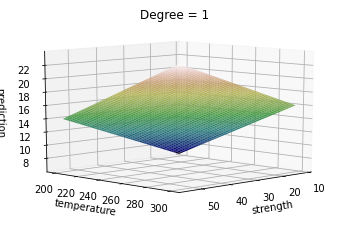

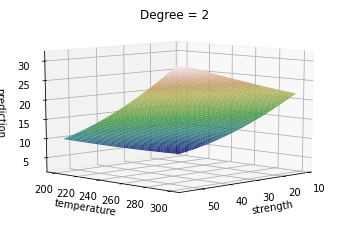

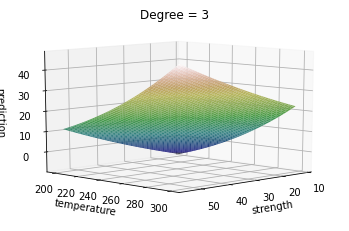

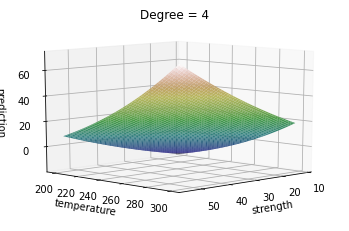

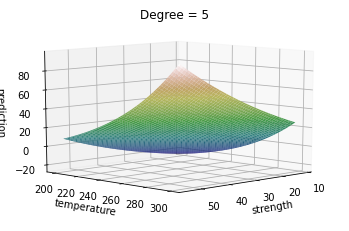

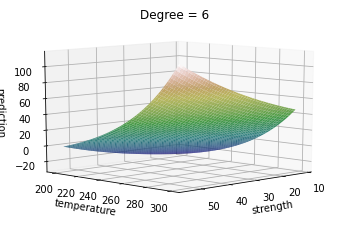

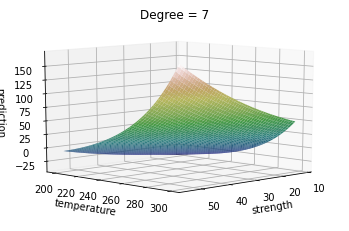

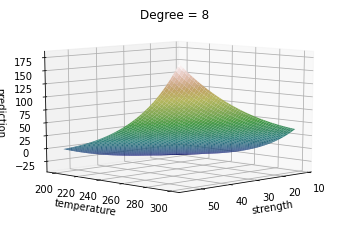

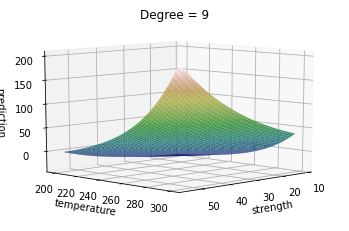

In [ ]:
for i in range(9):
  plot_preds(i+1,0.5)

### GD without regularization(degree 9)

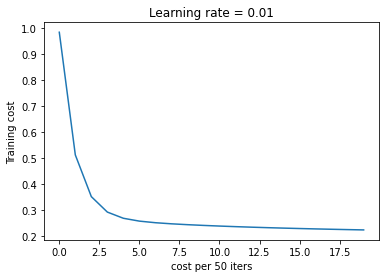

In [ ]:
w, b, costs_list_train, costs_list_test, final_errors, x_test = poly_regression(train_data, test_data, 0.01, 1000, 9)

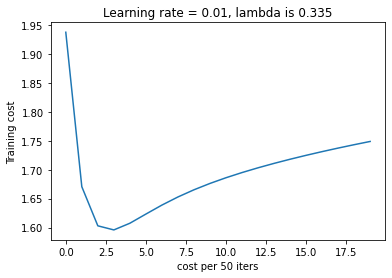

In [ ]:
w, b, costs_list_train, costs_list_test, final_errors, x_test = poly_regression(train_data, test_data, 0.01, 1000, 9, "ridge", 0.335,)

### GD with ridge regression(degree 9)

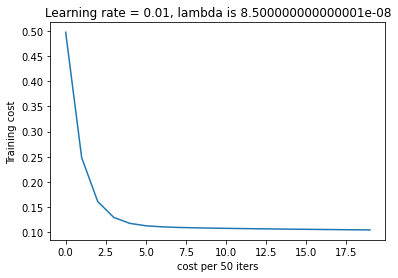

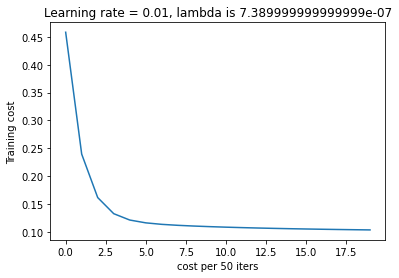

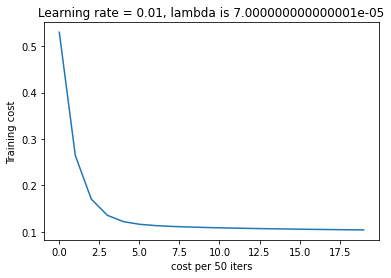

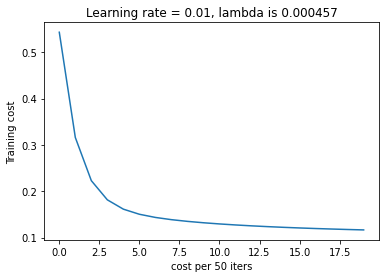

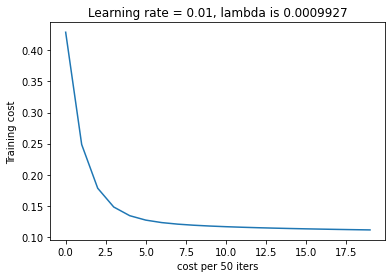

In [ ]:
i=1
ridge_rms_gd={lda: [] for lda in lmbdas}
ridge_test_gd = {lda: [] for lda in lmbdas}
ridge_reg_gd = {lda: [] for lda in lmbdas}#dictionary corresponding to testing and training error
for lda in lmbdas:
  printcost=False
  if i%6==0:
    printcost=True
  w, b, costs_list_train, costs_list_test, final_errors, x_test = poly_regression(train_data, test_data, 0.01, 1000, 9, "ridge", lda, printcost)
  train_error = costs_list_train[-1]
  test_error  = costs_list_test[-1]
  ridge_rms_gd[lda].append(final_errors["RMSE_train"])
  ridge_test_gd[lda].append(final_errors["RMSE_test"])
  ridge_reg_gd[lda].append([train_error,test_error])
  i+=1

  

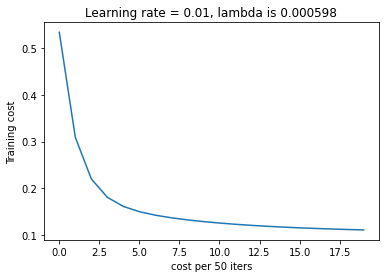

0.1105708458016585
0.24473510804035337


In [ ]:
w, b, single_costs_train, single_costs_test, final_errors, x_test = poly_regression(train_data, test_data, 0.01, 1000, 9, "ridge", 0.000598, True)
train_error = single_costs_train[-1]
test_error  = single_costs_test[-1]
print( train_error)
print(test_error)


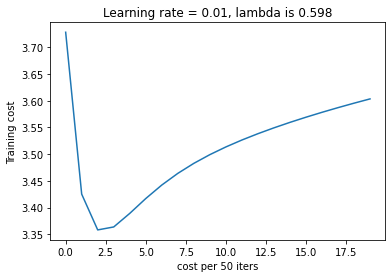

3.603481022934457
0.2508081284670538


In [ ]:
w, b, single_costs_train, single_costs_test, final_errors, x_test = poly_regression(train_data, test_data, 0.01, 1000, 9, "ridge", 0.598, True)
train_error = single_costs_train[-1]
test_error  = single_costs_test[-1]
print( train_error)
print(test_error)

In [ ]:
i=1
for key in ridge_reg_gd.keys():
  
  print("Value of lambda = ",key)
  print("Train Errors : ",end="")
  for i in range(len(ridge_reg_gd[key])):
    print(f"{ridge_reg_gd[key][i][0]:.4f}", end="  ")
  print("")
  print("Test Errors  : ",end="")
  for i in range(len(ridge_reg_gd[key])):
    print(f"{ridge_reg_gd[key][i][1]:.4f}", end="  ")
  print("")
  print("root mean square Error : ",end="")  
  for i in range(len(ridge_reg_gd[key])):
    print(f"{ridge_rms_gd[key][i]:.4f}", end="  ")
  print("\n")
  i+=1

Value of lambda =  1.11e-10
Train Errors : 0.1074  
Test Errors  : 0.2440  
root mean square Error : 0.4634  

Value of lambda =  3.898e-10
Train Errors : 0.1166  
Test Errors  : 0.2636  
root mean square Error : 0.4829  

Value of lambda =  4.0500000000000005e-10
Train Errors : 0.1130  
Test Errors  : 0.2547  
root mean square Error : 0.4753  

Value of lambda =  4.49e-10
Train Errors : 0.1092  
Test Errors  : 0.2494  
root mean square Error : 0.4674  

Value of lambda =  6.07e-08
Train Errors : 0.1095  
Test Errors  : 0.2489  
root mean square Error : 0.4680  

Value of lambda =  8.500000000000001e-08
Train Errors : 0.1045  
Test Errors  : 0.2381  
root mean square Error : 0.4571  

Value of lambda =  3.2499999999999996e-07
Train Errors : 0.1030  
Test Errors  : 0.2354  
root mean square Error : 0.4538  

Value of lambda =  6.490000000000001e-07
Train Errors : 0.1178  
Test Errors  : 0.2663  
root mean square Error : 0.4855  

Value of lambda =  6.760000000000001e-07
Train Errors : 0

### GD with lasso regression

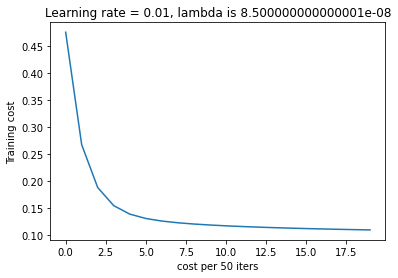

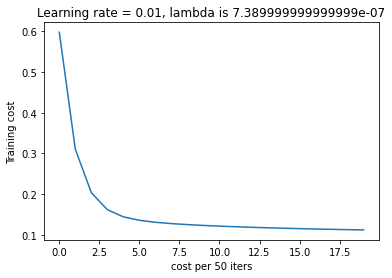

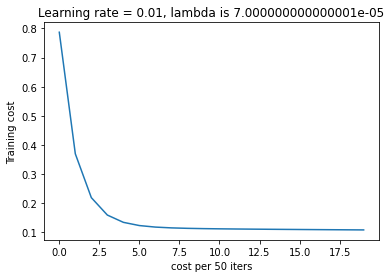

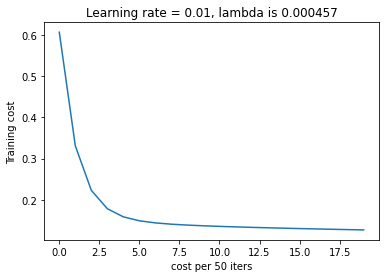

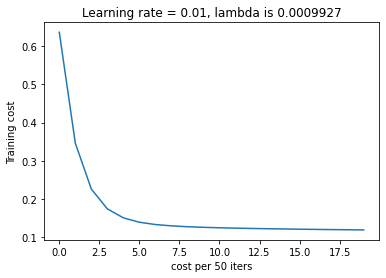

In [ ]:

i=1
lasso_reg_gd = {lda: [] for lda in lmbdas}#dictionary corresponding to testing and training error
lasso_rms_gd = {lda: [] for lda in lmbdas}
lasso_test_gd = {lda: [] for lda in lmbdas}
for lda in lmbdas:
  printcost=False
  if i%6==0:
    printcost=True
  w, b, costs_list_train, costs_list_test, final_errors, x_test = poly_regression(train_data, test_data, 0.01, 1000, 9, "lasso", lda, printcost)
  
  train_error = costs_list_train[-1]
  test_error  = costs_list_test[-1]
  lasso_reg_gd[lda].append([train_error,test_error])
  lasso_rms_gd[lda].append(final_errors["RMSE_train"])
  lasso_test_gd[lda].append(final_errors["RMSE_test"])
  i+=1

In [ ]:
i=1
for key in lasso_reg_gd.keys():
  
  print("Value of lambda = ",key)
  print("Train Errors : ",end="")
  for i in range(len(lasso_reg_gd[key])):
    print(f"{lasso_reg_gd[key][i][0]:.4f}", end="  ")
  print("")
  print("Test Errors  : ",end="")
  for i in range(len(lasso_reg_gd[key])):
    print(f"{lasso_reg_gd[key][i][1]:.4f}", end="  ")
  print("")
  print("root mean square Error : ",end="")  
  for i in range(len(ridge_reg_gd[key])):
    print(f"{lasso_rms_gd[key][i]:.4f}", end="  ")
  print("\n")
  i+=1

Value of lambda =  1.11e-10
Train Errors : 0.1126  
Test Errors  : 0.2556  
root mean square Error : 0.4745  

Value of lambda =  3.898e-10
Train Errors : 0.0994  
Test Errors  : 0.2285  
root mean square Error : 0.4459  

Value of lambda =  4.0500000000000005e-10
Train Errors : 0.1117  
Test Errors  : 0.2524  
root mean square Error : 0.4727  

Value of lambda =  4.49e-10
Train Errors : 0.1054  
Test Errors  : 0.2402  
root mean square Error : 0.4591  

Value of lambda =  6.07e-08
Train Errors : 0.1094  
Test Errors  : 0.2480  
root mean square Error : 0.4677  

Value of lambda =  8.500000000000001e-08
Train Errors : 0.1080  
Test Errors  : 0.2467  
root mean square Error : 0.4648  

Value of lambda =  3.2499999999999996e-07
Train Errors : 0.1112  
Test Errors  : 0.2532  
root mean square Error : 0.4715  

Value of lambda =  6.490000000000001e-07
Train Errors : 0.1126  
Test Errors  : 0.2549  
root mean square Error : 0.4745  

Value of lambda =  6.760000000000001e-07
Train Errors : 0

## Mini Batch SGD

In [ ]:
def mini_batch_sgd(train_df, test_df, lr, epochs, batch_size, degree, regularisation = None, lda = 0, printcost=True, minibatch=True ):

  df_train = pd.DataFrame()
  df_test = pd.DataFrame()

  if minibatch==False:#in case you want to do SGD without using minibatches
    batch_size=1
  
  for i in range(1,degree+1):
    for col in train_df.columns:
      if col!='Pressure':
        if int(col.split('_')[0]) <= degree:
          df_train[col] = train_df[col]
          df_test[col] = test_df[col]
      else:
          df_train[col] = train_df[col]
          df_test[col] = test_df[col]

  X_train = np.array(df_train.drop(columns = ['Pressure'])).T
  X_test = np.array(df_test.drop(columns = ['Pressure'])).T

  y_train = np.array(df_train['Pressure']).T
  y_test = np.array(df_test['Pressure']).T


  df_size=len(df_train)
  lenw = X_train.shape[0]
  w, b = init_params(lenw)
  costs_list = []
  costs_list_test = []
  final_errors = {"RMSE_test": 0, "RMSE_train": 0, "RMSE_val": 0}
  count = 0

  for i in range(1, epochs+1):
    if minibatch==True:
      start=0
    else:
      start = df_size-2
    # start=0
    while(start+batch_size < df_size):
      df_train = df_train.sample(frac = 1)#shuffle the dataset
      X_train = np.array(df_train.drop(columns = ['Pressure'])).T
      X_test = np.array(df_test.drop(columns = ['Pressure'])).T
      y_train = np.array(df_train['Pressure']).T
      y_test = np.array(df_test['Pressure']).T
      temp_x_train = X_train[:,start:start+batch_size]
      temp_y_train = y_train[start:start+batch_size]

      temp_z_train = predict(temp_x_train, w, b)
      z_train = predict(X_train, w, b)

      if(regularisation == None):
        cost_train = cost_function(z_train, y_train)
        dw, db = get_grads(temp_x_train, temp_y_train, temp_z_train)

      elif regularisation == "ridge":
        cost_train = cost_function_ridge(z_train, y_train, w, lda)
        dw, db = get_grads_ridge(temp_x_train, temp_y_train, temp_z_train, w, lda)

      elif regularisation == "lasso":
        cost_train = cost_function_lasso(z_train, y_train, w, lda)
        dw, db = get_grads_lasso(temp_x_train, temp_y_train, temp_z_train, w, lda)
      
      w, b = update_params(w, b, dw, db, lr)


      z_test = predict(X_test, w, b)
      cost_test = cost_function(z_test, y_test)

      if(i%20 == 0):
        costs_list.append(cost_train)
        costs_list_test.append(cost_test)

      #if printcost and i%50==0:
        #print("Epoch: " + str(i) + " --> " + "Train cost = " + str(cost_train) + " | Test cost = " + str(cost_test))
      count += 1

      start += batch_size

      if(i == epochs):
        RMSE_train = np.sqrt(np.mean(np.square(z_train-y_train)))
        final_errors["RMSE_train"] += RMSE_train
        
        z_test = predict(X_test, w, b)
        RMSE_test = np.sqrt(np.mean(np.square(z_test-y_test)))
        final_errors["RMSE_test"] += RMSE_test

  if printcost:
    plt.plot(costs_list)
    plt.xlabel("cost per 50 iterations")
    plt.ylabel("Training cost")
    if regularisation==None:
      plt.title("Learning rate = " + str(lr))
    else:
      plt.title("Learning rate = " + str(lr)+", Lambda = "+str(lda))
    
    plt.show()
    
  return w, b, costs_list, costs_list_test, final_errors, df_train

### Without regularization

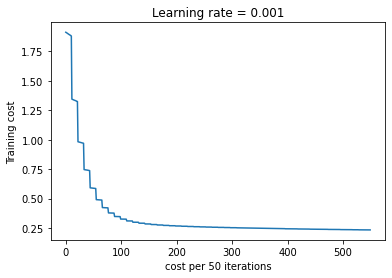

In [ ]:
w,b,costs_sgd,costs_sgd_test,errors,df_train = mini_batch_sgd(train_data,test_data,0.001,1000,100,9)#batch size =100

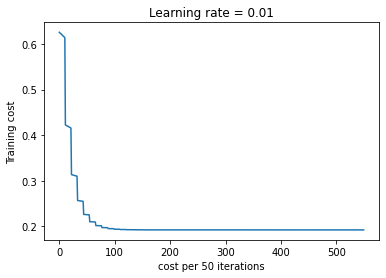

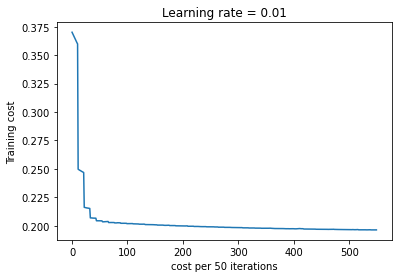

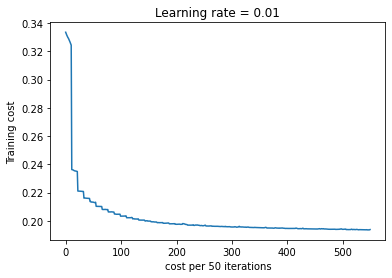

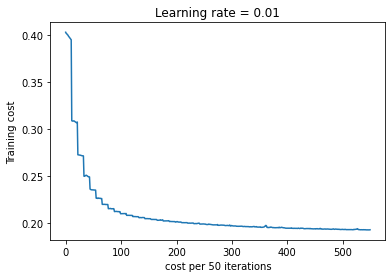

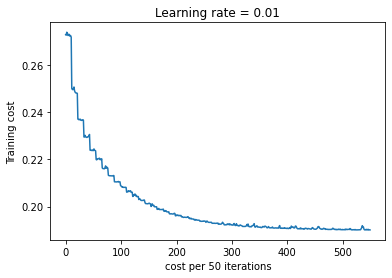

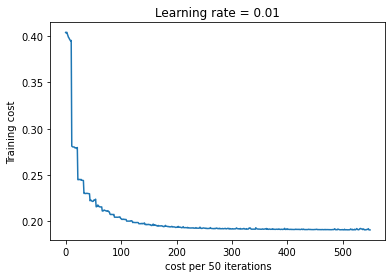

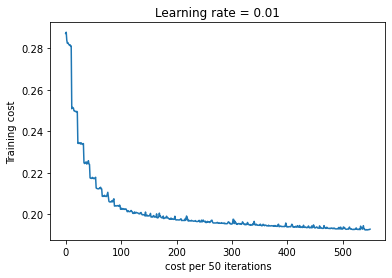

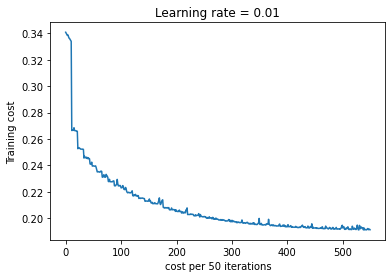

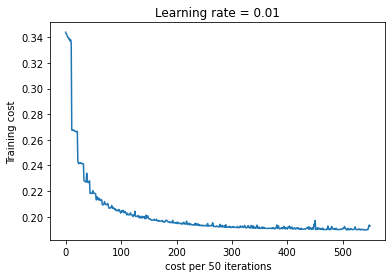

In [ ]:
sgd_non_reg = []
for degree in range(1,10):
  w, b, costs_list_train, costs_list_test, final_errors, x_test = mini_batch_sgd(train_data, test_data, 0.01, 1000,100, degree)
  train_error =costs_list_train[-1]
  test_error =costs_list_test[-1]
  sgd_non_reg.append([train_error,test_error])


In [ ]:
for i in range(0,9):
  print("For degree ",i+1,"Train error =", sgd_non_reg[i][0],"Test error =", sgd_non_reg[i][1])

For degree  1 Train error = 0.192518388519563 Test error = 0.21700003891063607
For degree  2 Train error = 0.19633941058091497 Test error = 0.2237641516771597
For degree  3 Train error = 0.1937430123789422 Test error = 0.2205511973214184
For degree  4 Train error = 0.19307267646579138 Test error = 0.21992468426749057
For degree  5 Train error = 0.19009626859731266 Test error = 0.2168035620833105
For degree  6 Train error = 0.1907625956401553 Test error = 0.21708875755513013
For degree  7 Train error = 0.1927998003290392 Test error = 0.21779415136606659
For degree  8 Train error = 0.19130671724145965 Test error = 0.2182134146476734
For degree  9 Train error = 0.19276864504628868 Test error = 0.2178629013494629


In [ ]:
def plot_preds(degree, lda=0, reg=None):
  %matplotlib inline
  w, b, costs_list_train, costs_list_test, final_errors, x_test = mini_batch_sgd(train_data, test_data, 0.01, 1000,100, degree,reg,lda,printcost=False)

  
  preds = []
  strength_ax = np.linspace(12,55,100)
  temp_ax = np.linspace(200,300,100)
 
  all_features = []

  for x in range(len(strength_ax)):
    for y in range(len(temp_ax)):

      features = []
      for i in range(1,degree+1):
        for j in range(i+1):
          features.append(strength_ax[x]**j * temp_ax[y]**(i-j))
      
      all_features.append(np.array(features))


  norm_all_features = (all_features - np.mean(all_features, axis=0))/np.std(all_features,axis=0)
  
  preds = []
  preds_temp = []
 
  for row in range(len(norm_all_features)):
    preds_temp.extend((predict(norm_all_features[row].T,w,b) *Pressure.std()) + Pressure.mean())

    if len(preds_temp)==len(temp_ax):
      preds.append(preds_temp)
      preds_temp = []
  
  preds = np.array(preds)

  from mpl_toolkits.mplot3d import axes3d
  
  %matplotlib inline

  x = np.array(strength_ax)
  y = np.array(temp_ax)
  X,Y = np.meshgrid(x,y)
  Z = np.array(preds)


  fig = plt.figure()
  ax = plt.axes(projection='3d')
  ax.view_init(10,45)

  mycmap = plt.get_cmap('gist_earth')

  ax.plot_surface(X, Y, Z, cmap=mycmap)
  ax.set_xlabel('strength')
  ax.set_ylabel('temperature')
  ax.set_zlabel('prediction')
  plt.title("Degree = " + str(degree))

  
  
  plt.show()


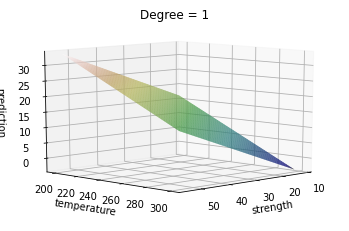

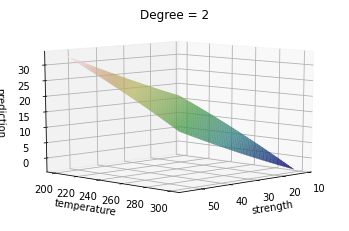

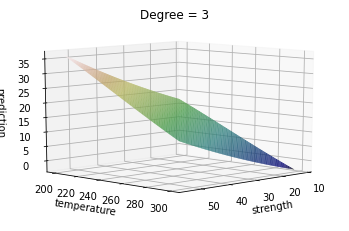

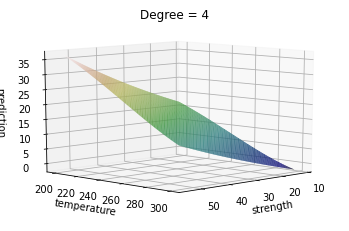

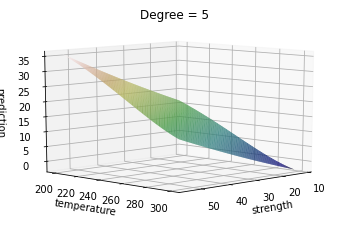

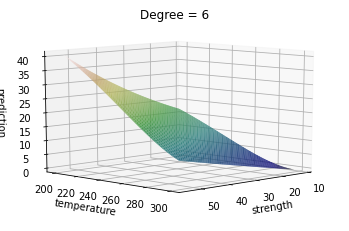

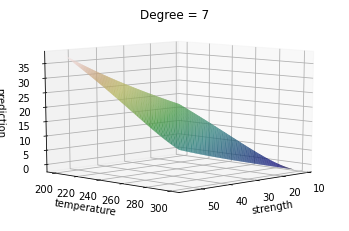

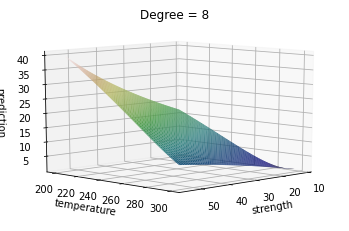

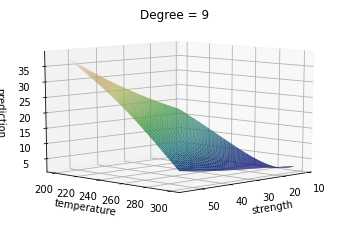

In [ ]:
for i in range(9):
  plot_preds(i+1,0.5)

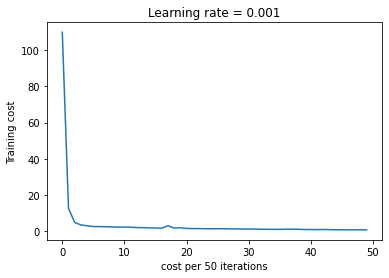

In [ ]:
w,b,costs_sgd,costs_sgd_test,errors,df_train = mini_batch_sgd(train_data,test_data,0.001,1000,1,9,regularisation=None, lda=0, printcost=True, minibatch=False)

### Ridge regression

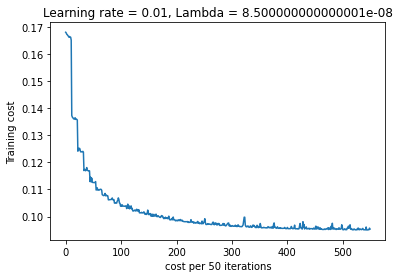

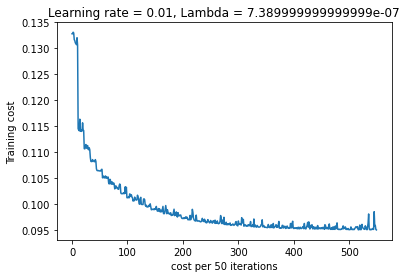

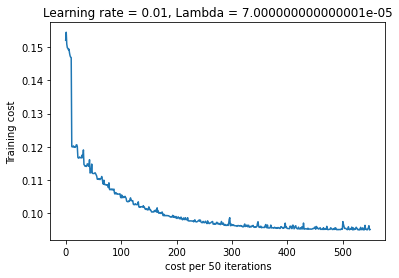

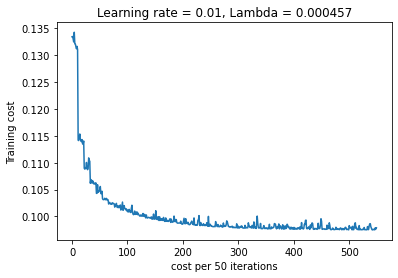

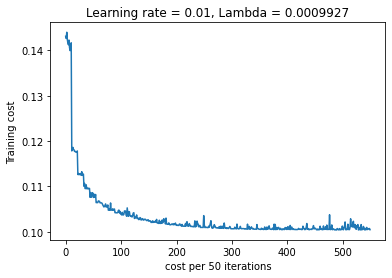

In [ ]:
ridge_rms_sgd={lda: [] for lda in lmbdas}
ridge_test_sgd = {lda: [] for lda in lmbdas}
ridge_reg_sgd = {lda: [] for lda in lmbdas}#dictionary corresponding to testing and training error
i=1
#random.shuffle(lmbdas)
for lda in lmbdas:
  printcost=False
  if i%6==0:
    printcost=True
  w,b,costs_sgd,costs_sgd_test,final_errors,df_train = mini_batch_sgd(train_data,test_data,0.01,1000,100,9,"ridge", lda, printcost)
  train_error = costs_sgd[-1]
  test_error  = costs_sgd_test[-1]
  ridge_rms_sgd[lda].append(final_errors["RMSE_train"])
  ridge_test_sgd[lda].append(final_errors["RMSE_test"])
  ridge_reg_sgd[lda].append([train_error,test_error])
  i+=1


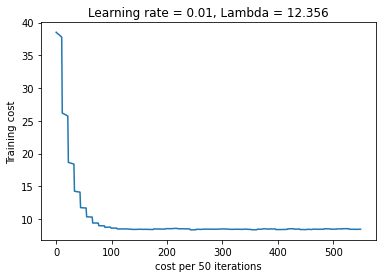

In [ ]:
w,b,costs_list_train,costs_list_test,errors,df_train = mini_batch_sgd(train_data,test_data,0.01,1000,100,9,"ridge", 12.356, True)

In [ ]:
from pandas.plotting import table # EDIT: see deprecation warnings below
i=1
ldas=[]
training_errors=[]
testing_errors=[]
for key in ridge_reg_sgd.keys():

  if i%6==0:
    ldas.append(key)
    training_errors.append(ridge_reg_sgd[key][0][0])
    testing_errors.append(ridge_reg_sgd[key][0][1])
    # print(i)
  print("Value of lambda = ",key)
  print("Train Errors : ",end="")
  for i in range(len(ridge_reg_sgd[key])):
    print(f"{ridge_reg_sgd[key][i][0]:.4f}", end="  ")
    
  print("")
  print("Test Errors  : ",end="")
  for i in range(len(ridge_reg_sgd[key])):
    print(f"{ridge_reg_sgd[key][i][1]:.4f}", end="  ")
    
  print("")
  print("root mean square Error : ",end="") 
  for i in range(len(ridge_rms_sgd[key])):
    print(f"{ridge_rms_sgd[key][i]:.4f}", end="  ")
  print("\n")
  i+=1
data={'Value of lambda': ldas, 'Training errors': training_errors, 'Testing errors': testing_errors}
lmbda_table=pd.DataFrame(data)
lmbda_table
# lmbda_table.to_csv('lambda_errors.csv')
# ax = plt.subplot(111, frame_on=False) # no visible frame
# ax.xaxis.set_visible(False)  # hide the x axis
# ax.yaxis.set_visible(False)  # hide the y axis

# table(ax, lmbda_table)  # where df is your data frame

# plt.savefig('mytable.png')

Value of lambda =  1.11e-10
Train Errors : 0.0957  
Test Errors  : 0.2189  
root mean square Error : 4.8130  

Value of lambda =  3.898e-10
Train Errors : 0.0962  
Test Errors  : 0.2181  
root mean square Error : 4.7966  

Value of lambda =  4.0500000000000005e-10
Train Errors : 0.0951  
Test Errors  : 0.2174  
root mean square Error : 4.8003  

Value of lambda =  4.49e-10
Train Errors : 0.0958  
Test Errors  : 0.2193  
root mean square Error : 4.8094  

Value of lambda =  6.07e-08
Train Errors : 0.0955  
Test Errors  : 0.2182  
root mean square Error : 4.8101  

Value of lambda =  8.500000000000001e-08
Train Errors : 0.0954  
Test Errors  : 0.2169  
root mean square Error : 4.8018  

Value of lambda =  3.2499999999999996e-07
Train Errors : 0.0949  
Test Errors  : 0.2163  
root mean square Error : 4.8007  

Value of lambda =  6.490000000000001e-07
Train Errors : 0.0960  
Test Errors  : 0.2171  
root mean square Error : 4.8003  

Value of lambda =  6.760000000000001e-07
Train Errors : 0

,Value of lambda,Training errors,Testing errors


### Lasso Regression SGD degree 9

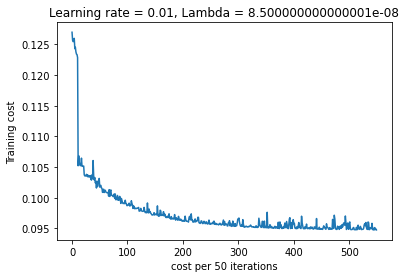

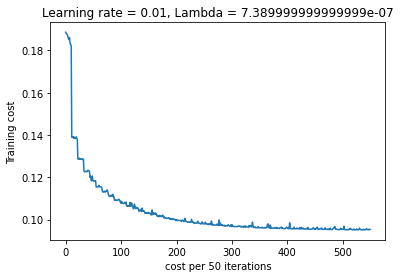

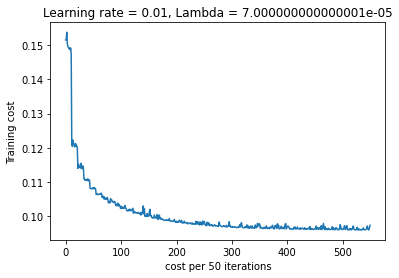

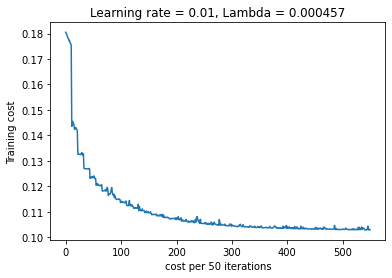

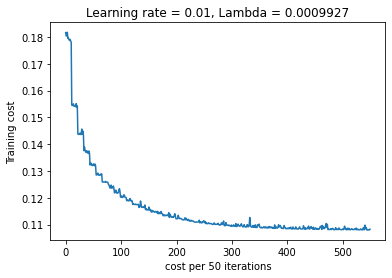

In [ ]:
lasso_rms_sgd={lda: [] for lda in lmbdas}
lasso_test_sgd = {lda: [] for lda in lmbdas}
lasso_reg_sgd = {lda: [] for lda in lmbdas}#dictionary corresponding to testing and training error
i=1
#random.shuffle(lmbdas)
for lda in lmbdas:
  printcost=False
  if i%6==0:
    printcost=True
  w,b,costs_sgd,costs_sgd_test,final_errors,df_train = mini_batch_sgd(train_data,test_data,0.01,1000,100,9,"lasso", lda, printcost)
  train_error = costs_sgd[-1]
  test_error  = costs_sgd_test[-1]
  lasso_rms_sgd[lda].append(final_errors["RMSE_train"])
  lasso_test_sgd[lda].append(final_errors["RMSE_test"])
  lasso_reg_sgd[lda].append([train_error,test_error])
  i+=1


In [ ]:
i=1
ldas=[]
training_errors=[]
testing_errors=[]
rmse_test=[]
rmse_train=[]
for key in lasso_reg_sgd.keys():
  if i%6==0:
    ldas.append(key)
    training_errors.append(lasso_reg_sgd[key][0][0])
    testing_errors.append(lasso_reg_sgd[key][0][1])
    rmse_train.append(lasso_rms_sgd[key][0])
    rmse_test.append(lasso_test_sgd[key][0])
    # print("Value of lambda = ",key)
    # print("Train Errors : ",end="")
    # for i in range(len(lasso_reg_sgd[key])):
    #   print(f"{lasso_reg_sgd[key][i][0]:.4f}", end="  ")
    # print("")
    # print("Test Errors  : ",end="")
    # for i in range(len(lasso_reg_sgd[key])):
    #   print(f"{lasso_reg_sgd[key][i][1]:.4f}", end="  ")
    # print("")
    # print("root mean square Error : ",end="") 
    # for i in range(len(lasso_rms_sgd[key])):
    #   print(f"{lasso_rms_sgd[key][i]:.4f}", end="  ")
    # print("\n")
  
  i+=1
data={'Value of lambda': ldas, 'Training errors': training_errors, 'Testing errors': testing_errors,'RMSE Train': rmse_train, 'RMSE Test': rmse_test}
lmbda_table=pd.DataFrame(data)
lmbda_table

,Value of lambda,Training errors,Testing errors,RMSE Train,RMSE Test
0,8.500000e-08,0.094746,0.217557,4.794719,5.128910
1,7.390000e-07,0.095334,0.217335,4.801993,5.132598
2,7.000000e-05,0.097314,0.216753,4.801516,5.130119
3,4.570000e-04,0.103056,0.219606,4.823021,5.161754
4,9.927000e-04,0.108281,0.217798,4.811346,5.135809


### Plots

[0.46338644347747016, 0.48291580307867515, 0.4753122122855073, 0.46740555354774177, 0.46803913436623745, 0.4570829705235015, 0.45376606126234575, 0.48546194977281987, 0.4520440965307524, 0.48134453971625474, 0.4829221764039165, 0.45442110247984296, 0.4832568197012041, 0.48095580768798046, 0.4530854339655488, 0.4607160576614376, 0.46566608999066844, 0.45585276905399685, 0.49279350082877393, 0.49203348699671406, 0.44250874728160566, 0.5007901175296087, 0.47228348125053304, 0.47696100990248214, 0.4936841688317491, 0.4743853795811583, 0.45407418576788855, 0.475617896158803, 0.45549195459193315, 0.4583385881212119]
[-22.921490914616214, -21.665387328855086, -21.627134048822008, -21.523998228186294, -16.617322138880958, -16.280614580456096, -14.939440654616673, -14.247833120242321, -14.207072760903447, -14.181082102410763, -14.161528207429019, -14.117967915998209, -14.091791207691612, -13.899435792902036, -12.429216196844383, -11.675444394468004, -10.223692816693468, -9.567015315914915, -9.0

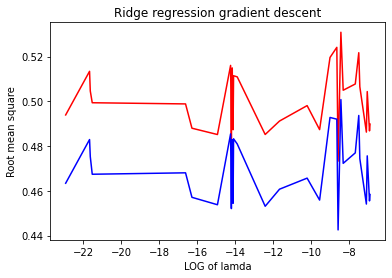

In [ ]:
RMSE=[]
RMSE_test=[]
log_lmda=[]
for key in ridge_reg_gd.keys():
  log_lmda.append(math.log(key))

  for i in range(len(ridge_rms_gd[key])):
     RMSE.append(ridge_rms_gd[key][i])
     RMSE_test.append(ridge_test_gd[key][i])
print(RMSE)
print(log_lmda)
log_lmda,RMSE = zip(*sorted(zip(log_lmda,RMSE)))
log_lmda,RMSE_test = zip(*sorted(zip(log_lmda,RMSE_test)))
plt.plot(log_lmda,RMSE_test, color="red")
plt.plot(log_lmda,RMSE, color="blue")
plt.xlabel("LOG of lamda")
plt.ylabel("Root mean square")
plt.title("Ridge regression gradient descent")
plt.show()
  


[0.4806248606279782, 0.475519897628188, 0.47107551116146595, 0.4731723517833257, 0.4685664010589128, 0.4666411476543401, 0.44183852069182267, 0.48363176836886806, 0.47672557326199805, 0.4505460029903693, 0.4473273204177865, 0.47425376083050147, 0.45675396452869094, 0.4612421411641925, 0.4649927358466219, 0.4532422010607178, 0.4569049181548047, 0.46442574080981414, 0.4722743632212458, 0.4660805148767091, 0.48073137323618853, 0.4555610714313846, 0.4688741200302095, 0.4928108904018165, 0.46120017575837396, 0.4725087682085724, 0.4721327104592475, 0.45877663649129624, 0.47074433143505107, 0.4606943405836885]
[-22.921490914616214, -21.665387328855086, -21.627134048822008, -21.523998228186294, -16.617322138880958, -16.280614580456096, -14.939440654616673, -14.247833120242321, -14.207072760903447, -14.181082102410763, -14.161528207429019, -14.117967915998209, -14.091791207691612, -13.899435792902036, -12.429216196844383, -11.675444394468004, -10.223692816693468, -9.567015315914915, -9.01972001

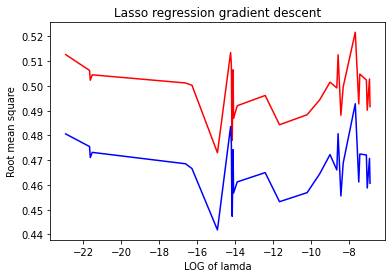

In [ ]:
RMSE=[]
RMSE_test=[]
log_lmda=[]
for key in lasso_reg_gd.keys():
  log_lmda.append(math.log(key))

  for i in range(len(lasso_rms_gd[key])):
     RMSE.append(lasso_rms_gd[key][i])
     RMSE_test.append(lasso_test_gd[key][i])
print(RMSE)
print(log_lmda)
log_lmda,RMSE = zip(*sorted(zip(log_lmda,RMSE)))
log_lmda,RMSE_test = zip(*sorted(zip(log_lmda,RMSE_test)))
plt.plot(log_lmda,RMSE_test, color="red")
plt.plot(log_lmda,RMSE, color="blue")
plt.xlabel("LOG of lamda")
plt.ylabel("Root mean square")
plt.title("Lasso regression gradient descent")
plt.show()

[4.812954447270755, 4.796633307347259, 4.800296908075622, 4.8094349623249615, 4.810126381271799, 4.801849411308987, 4.8007191058601455, 4.800278978837689, 4.808631058575134, 4.799512182113009, 4.794690907248239, 4.8103170443772285, 4.795489543804168, 4.786907989500737, 4.806935126797873, 4.796936091934155, 4.786320634203012, 4.792116403002651, 4.806104990974342, 4.796227692805385, 4.790345186073934, 4.805259561779104, 4.799620443813471, 4.793536387556364, 4.796014484951585, 4.794890555828657, 4.79493822642293, 4.797795909688752, 4.807092214663707, 4.784118648353573]
[5.145909623568176, 5.140581222094213, 5.138495872533194, 5.15566305551052, 5.147490765272278, 5.125624541514671, 5.118595771591342, 5.130846369638343, 5.152107664433535, 5.137311341242098, 5.134350970229277, 5.1385720075387455, 5.131211664461425, 5.119729536833079, 5.137509679178272, 5.125446494107268, 5.104396161207926, 5.1313865264782175, 5.149027059178664, 5.14135085925878, 5.120999734589403, 5.137525562385794, 5.132383

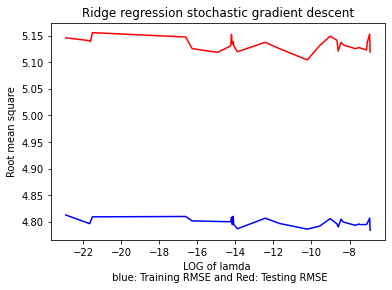

In [ ]:
RMSE=[]
RMSE_test=[]
log_lmda=[]
for key in ridge_reg_sgd.keys():
  log_lmda.append(math.log(key))

  for i in range(len(ridge_rms_sgd[key])):
     RMSE.append(ridge_rms_sgd[key][i])
     RMSE_test.append(ridge_test_sgd[key][i])
print(RMSE)
print(RMSE_test)
print(log_lmda)
log_lmda,RMSE = zip(*sorted(zip(log_lmda,RMSE)))
log_lmda,RMSE_test = zip(*sorted(zip(log_lmda,RMSE_test)))
plt.plot(log_lmda,RMSE_test, color="red")
plt.plot(log_lmda,RMSE, color="blue")
plt.xlabel("LOG of lamda \n blue: Training RMSE and Red: Testing RMSE")
plt.ylabel("Root mean square")
plt.title("Ridge regression stochastic gradient descent")
plt.show()

[4.790633430649345, 4.8072639505650185, 4.798189736835316, 4.80470131289335, 4.803428998749945, 4.794718739002649, 4.803786858316858, 4.787777272014845, 4.821045611808173, 4.800314906243939, 4.79675078058988, 4.801993349945978, 4.807906525650812, 4.794601562161982, 4.805576692634742, 4.795245057460474, 4.786934667521885, 4.801516141635384, 4.787671013653508, 4.7936810470863715, 4.801469624716645, 4.803976948560504, 4.809855655520252, 4.823021458062503, 4.798231687472521, 4.8022702415306515, 4.815828944888961, 4.793265609710059, 4.809698607415104, 4.811345655238062]
[5.129172939416583, 5.126333127073, 5.130989543904342, 5.134752439229676, 5.143572746745631, 5.128910011753217, 5.146838852799958, 5.115977287185087, 5.156503356506695, 5.141504172268323, 5.138798793209725, 5.132597771945807, 5.140781616827931, 5.131714719419178, 5.153412635091779, 5.1269308660476405, 5.124713651822085, 5.1301189847649855, 5.12343782151175, 5.137867608435692, 5.138360462987186, 5.142738082804751, 5.143455191

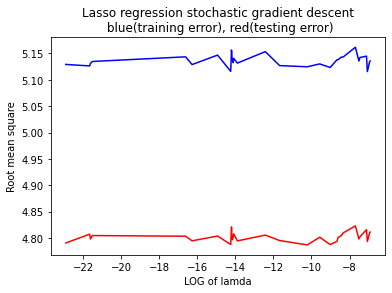

In [ ]:
RMSE=[]
RMSE_test=[]
log_lmda=[]
for key in lasso_reg_sgd.keys():
  log_lmda.append(math.log(key))

  for i in range(len(lasso_rms_sgd[key])):
     RMSE.append(lasso_rms_sgd[key][i])
     RMSE_test.append(lasso_test_sgd[key][i])
print(RMSE)
print(RMSE_test)
print(log_lmda)
log_lmda,RMSE = zip(*sorted(zip(log_lmda,RMSE)))
log_lmda,RMSE_test = zip(*sorted(zip(log_lmda,RMSE_test)))
plt.plot(log_lmda,RMSE_test, color="blue")
plt.plot(log_lmda,RMSE, color="red")
plt.xlabel("LOG of lamda")
plt.ylabel("Root mean square")
plt.title("Lasso regression stochastic gradient descent\n blue(training error), red(testing error)")
plt.show()

[0.4806248606279782, 0.475519897628188, 0.47107551116146595, 0.4731723517833257, 0.4685664010589128, 0.4666411476543401, 0.44183852069182267, 0.48363176836886806, 0.47672557326199805, 0.4505460029903693, 0.4473273204177865, 0.47425376083050147, 0.45675396452869094, 0.4612421411641925, 0.4649927358466219, 0.4532422010607178, 0.4569049181548047, 0.46442574080981414, 0.4722743632212458, 0.4660805148767091, 0.48073137323618853, 0.4555610714313846, 0.4688741200302095, 0.4928108904018165, 0.46120017575837396, 0.4725087682085724, 0.4721327104592475, 0.45877663649129624, 0.47074433143505107, 0.4606943405836885]
[-22.921490914616214, -21.665387328855086, -21.627134048822008, -21.523998228186294, -16.617322138880958, -16.280614580456096, -14.939440654616673, -14.247833120242321, -14.207072760903447, -14.181082102410763, -14.161528207429019, -14.117967915998209, -14.091791207691612, -13.899435792902036, -12.429216196844383, -11.675444394468004, -10.223692816693468, -9.567015315914915, -9.01972001

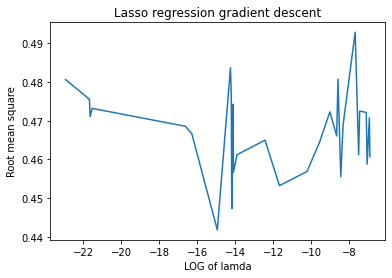

In [ ]:
RMSE=[]
log_lmda=[]
for key in lasso_reg_gd.keys():
  log_lmda.append(math.log(key))

  for i in range(len(lasso_rms_gd[key])):
     RMSE.append(lasso_rms_gd[key][i])
print(RMSE)
print(log_lmda)
log_lmda,RMSE = zip(*sorted(zip(log_lmda,RMSE)))

plt.plot(log_lmda,RMSE)
plt.xlabel("LOG of lamda")
plt.ylabel("Root mean square")
plt.title("Lasso regression gradient descent")
plt.show()